In [3]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
data=pd.read_csv("supply_chain_data.csv")
print(data)

    Product type     SKU      Price  Availability  Number of products sold  \
0       haircare    SKU0  69.808006            55                      802   
1       skincare    SKU1  14.843523            95                      736   
2       haircare    SKU2  11.319683            34                        8   
3       skincare    SKU3  61.163343            68                       83   
4      body wash    SKU4   4.805496            26                      871   
..           ...     ...        ...           ...                      ...   
196    body wash  SKU196  13.017377            55                      246   
197     skincare  SKU197  50.847393            28                      168   
198     haircare  SKU198  39.629344            73                      142   
199     skincare  SKU199  15.707796            11                      996   
200    body wash  SKU200  13.017377            55                      246   

     Revenue generated Customer demographics  Stock levels  Lea

In [5]:
data.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [7]:
data['Product type'].unique()

array(['haircare', 'skincare', 'body wash', 'cosmetics'], dtype=object)

In [9]:
data['Transportation modes'].unique()

array(['Road', 'Air', 'Rail', 'Sea'], dtype=object)

In [11]:
data['Routes'].unique()

array(['Route B', 'Route C', 'Route A'], dtype=object)

In [15]:
data['Location'].unique()


array(['Mumbai', 'Coimbatore', 'Kolkata', 'Delhi', 'Bangalore', 'Chennai'],
      dtype=object)

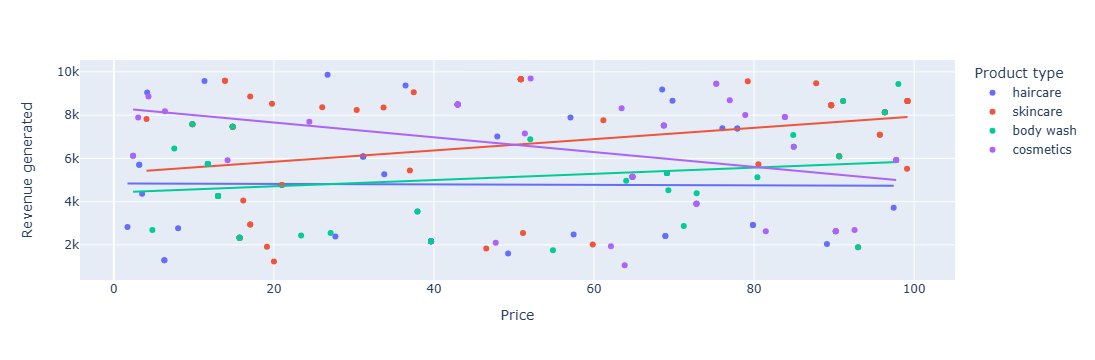

In [17]:
fig = px.scatter(data,x='Price',y='Revenue generated',
                color='Product type',
                hover_data = ['Number of products sold'],
                trendline='ols')
fig.show()

In [18]:
sales_data = data.groupby('Product type')['Number of products sold'].sum().reset_index()
sales_data

Product type  Number of products sold
0    body wash                    18943
1    cosmetics                    19202
2     haircare                    20836
3     skincare                    34307

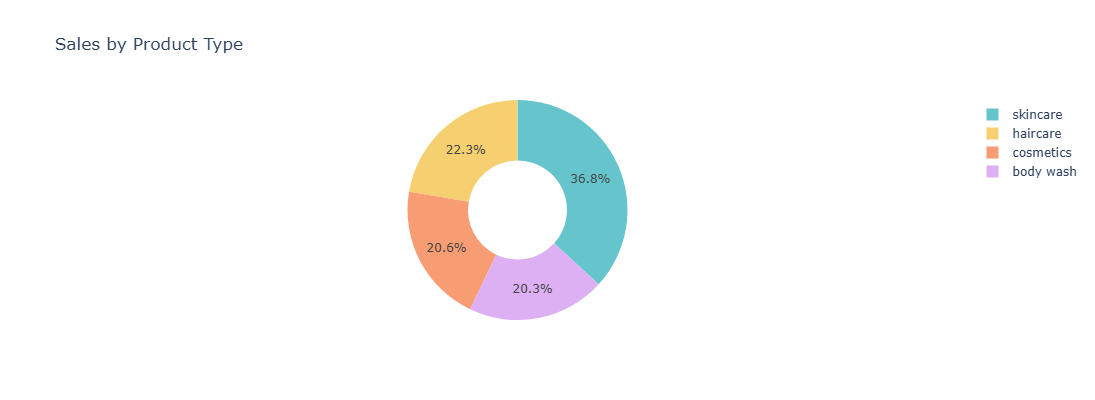

In [27]:
pie_chart = px.pie(
    sales_data, 
    values='Number of products sold', 
    names='Product type', 
    title='Sales by Product Type', 
    hover_data=['Number of products sold'], 
    hole=0.45, 
    color_discrete_sequence=px.colors.qualitative.Pastel
)

# Set figure size
pie_chart.update_layout(
    width=500,  # Increase width
    height=400  # Increase height
)

pie_chart.update_traces(textposition='inside', textinfo='percent')
pie_chart.show()

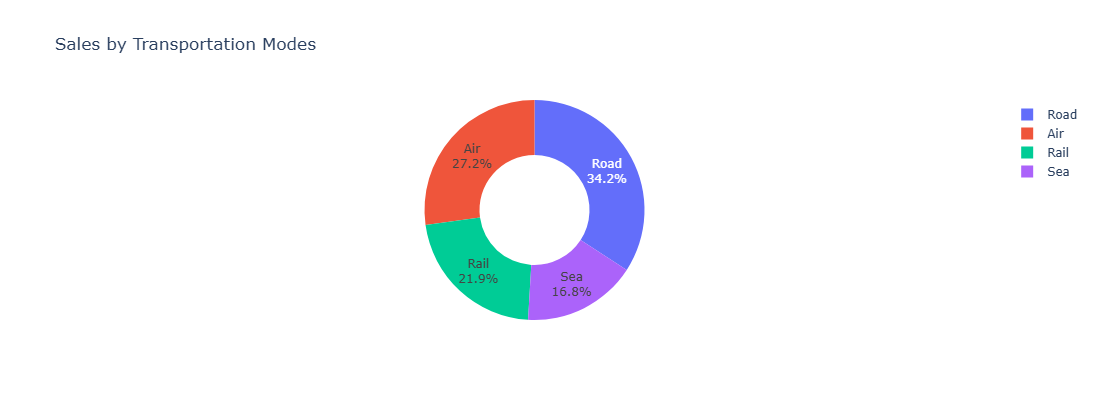

In [31]:
import plotly.express as px

trans_data = data.groupby('Transportation modes')['Number of products sold'].sum().reset_index()

pie_chart = px.pie(
    trans_data, 
    values='Number of products sold', 
    names='Transportation modes',
    title='Sales by Transportation Modes',
    hover_data=['Number of products sold'],
    hole=0.5
)

# Increase figure size
pie_chart.update_layout(
    width=500,  # Adjust width
    height=400  # Adjust height
)

pie_chart.update_traces(textposition='inside', textinfo='percent+label')
pie_chart.show()


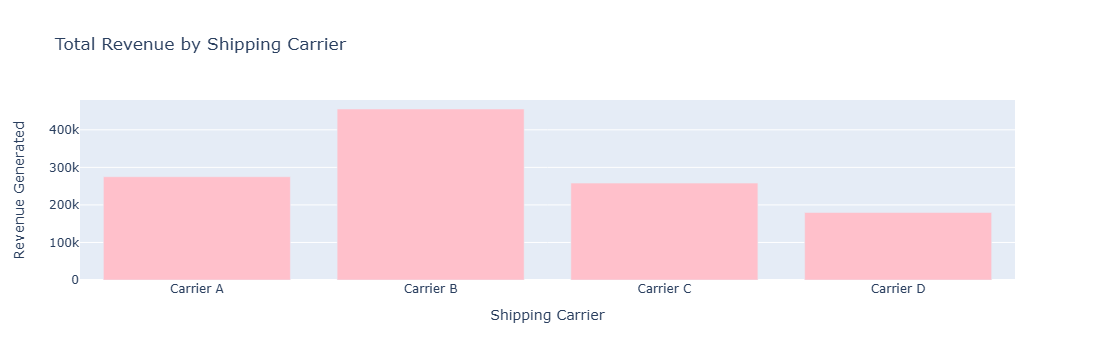

In [49]:
total_revenue = data.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()

# Create the figure
fig = go.Figure()

# Add the bar chart
fig.add_trace(go.Bar(x=total_revenue['Shipping carriers'],
                     y=total_revenue['Revenue generated'],
                     marker=dict(color='pink')))

# Update the layout
fig.update_layout(title='Total Revenue by Shipping Carrier',
                  xaxis_title='Shipping Carrier',
                  yaxis_title='Revenue Generated')

# Show the chart
fig.show()

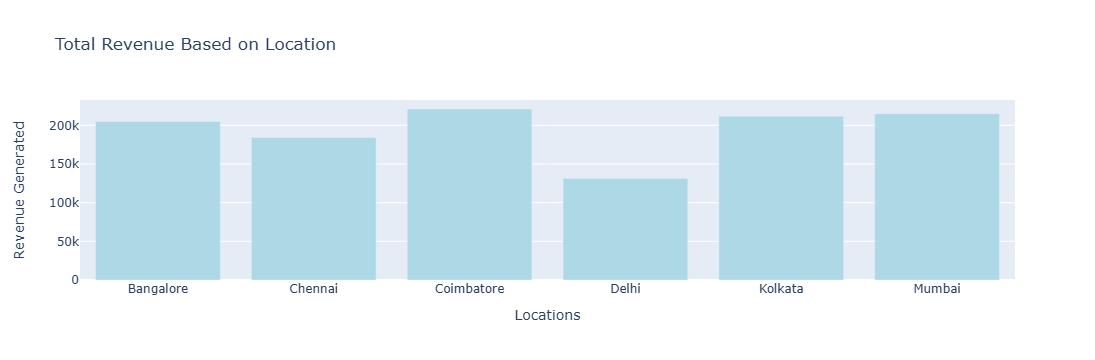

In [51]:
total_revenue = data.groupby('Location')['Revenue generated'].sum().reset_index()

# Create the figure
fig = go.Figure()

# Add the bar chart
fig.add_trace(go.Bar(x=total_revenue['Location'],
                     y=total_revenue['Revenue generated'],
                     marker=dict(color='lightblue')))  # Set the bar color to purple

# Update the layout
fig.update_layout(title='Total Revenue Based on Location',
                  xaxis_title='Locations',
                  yaxis_title='Revenue Generated')

# Show the chart
fig.show()


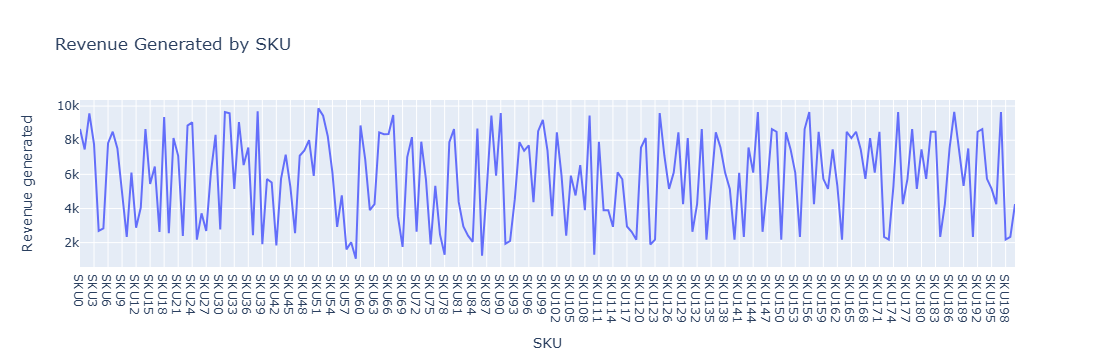

In [53]:
revenue_chart = px.line(data,x='SKU',y='Revenue generated',
                       title='Revenue Generated by SKU')
revenue_chart.show()

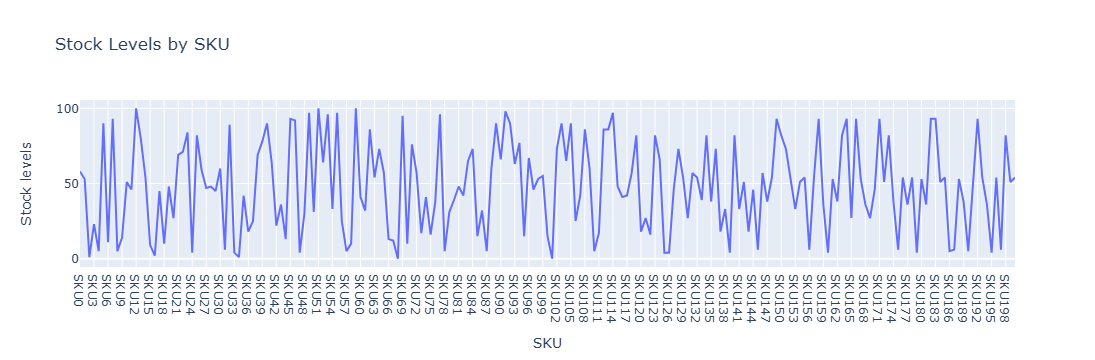

In [59]:
stock_chart = px.line(data,x='SKU',
                     y='Stock levels',
                     title='Stock Levels by SKU')
stock_chart.show()

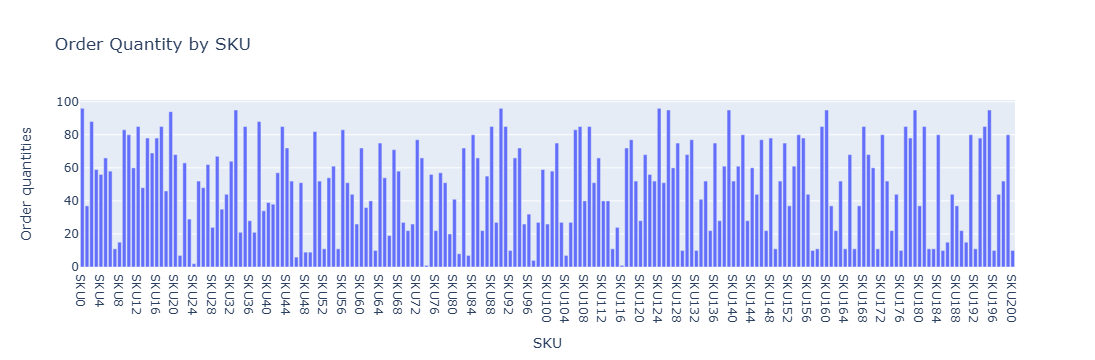

In [61]:
order_quantity_chart = px.bar(data,x ='SKU',
                             y='Order quantities',
                             title='Order Quantity by SKU')
order_quantity_chart.show()


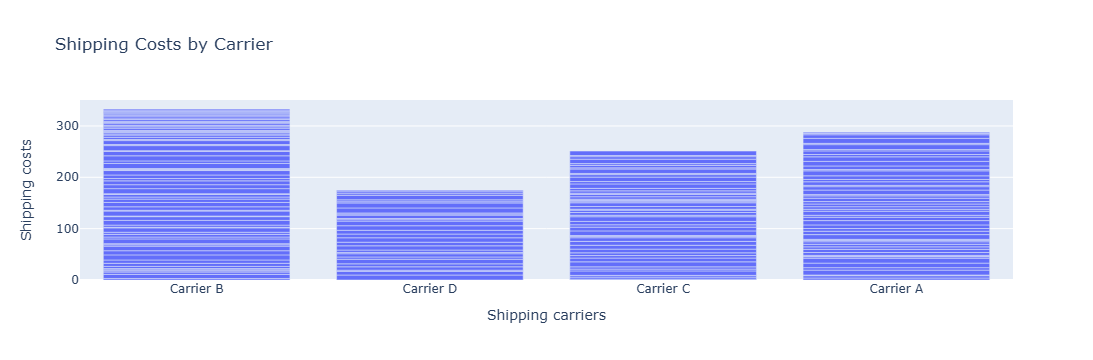

In [63]:
shipping_cost_chart = px.bar(data,x='Shipping carriers',
                            y='Shipping costs',
                            title='Shipping Costs by Carrier')
shipping_cost_chart.show()

In [ ]:

# Increase figure size
transportation_chart.update_layout(
    width=500,  # Adjust width
    height=400  # Adjust height
)

# Update text display

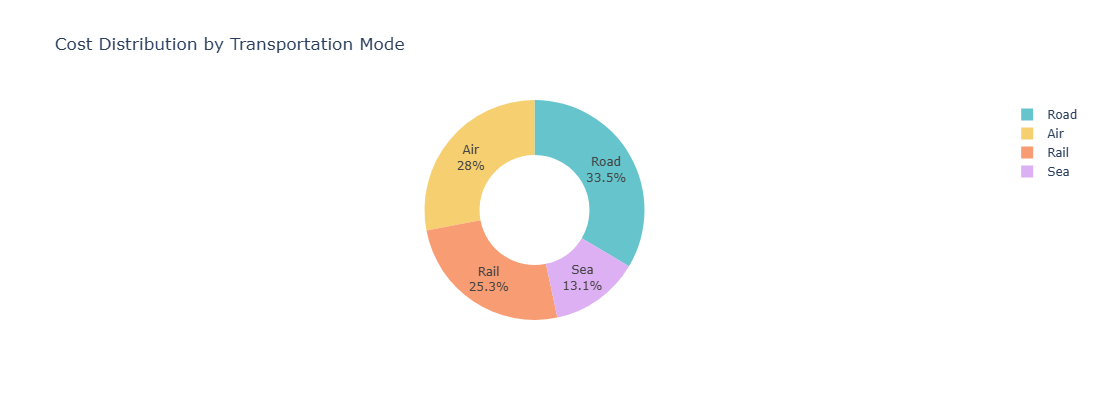

In [35]:
import plotly.express as px

# Creating the pie chart
transportation_chart = px.pie(
    data,
    values='Costs',
    names='Transportation modes',
    title='Cost Distribution by Transportation Mode',
    hole=0.5,
    color_discrete_sequence=px.colors.qualitative.Pastel
)

# Increase figure size
transportation_chart.update_layout(
    width=500,  # Adjust width
    height=400  # Adjust height
)

# Update text display

transportation_chart.update_traces(textposition='inside', textinfo='percent+label')

# Show the chart
transportation_chart.show()

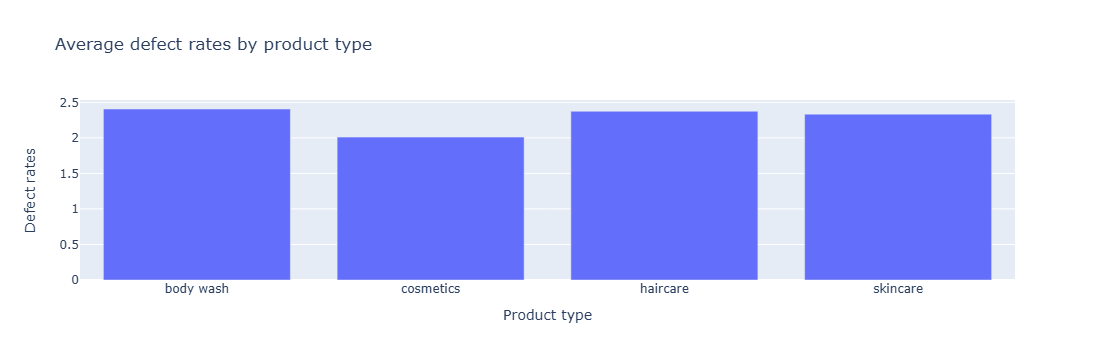

In [69]:
defect_rate_by_product = data.groupby('Product type')['Defect rates'].mean().reset_index()

fig = px.bar(defect_rate_by_product, x='Product type', y='Defect rates',
             title='Average defect rates by product type')
fig.show()


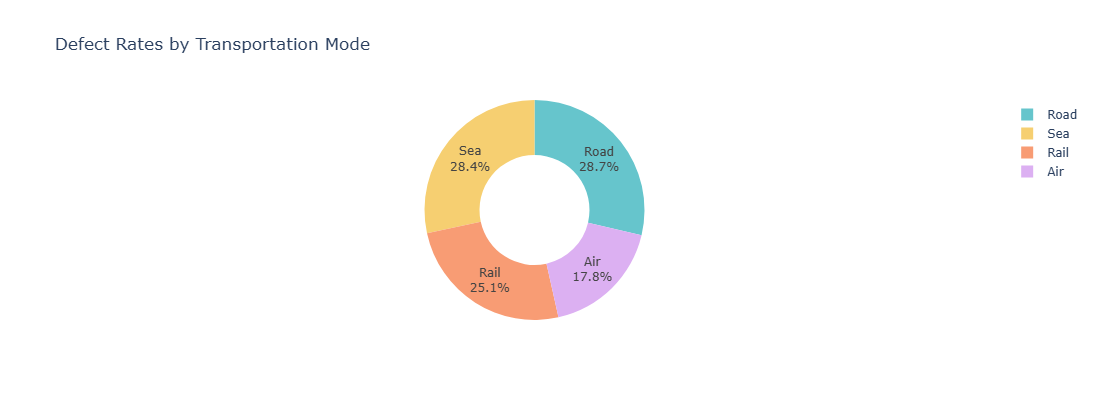

In [37]:
import plotly.express as px

# Grouping data and calculating the mean defect rate
trans = data.groupby('Transportation modes')['Defect rates'].mean().reset_index()

# Creating the pie chart
trans_chart = px.pie(
    trans,
    values='Defect rates',
    names='Transportation modes',
    title='Defect Rates by Transportation Mode',
    hole=0.5,
    color_discrete_sequence=px.colors.qualitative.Pastel
)
)

# Increase figure size
trans_chart.update_layout(
    width=500,  # Adjust width
    height=400  # Adjust height
)
# Update text display
trans_chart.update_traces(textposition='inside', textinfo='label+percent')

# Show the chart
trans_chart.show()